In [ ]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#dataframe
import pandas as pd

# Splitting data
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import os
import numpy as np

#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#model layers
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout, Flatten, Conv2D,MaxPool2D
from tensorflow.keras.applications.resnet import ResNet50

#callbcks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#image preprocessing
from PIL import Image
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
df_Traffic = pd.read_csv('/content/drive/MyDrive/DBDA_PROJECT/archive/labelscsv.csv')
df_Traffic.head()


,CLASS_ID,NAME
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


# **total number of images**

In [ ]:
#total number of images 

num_imgs = 0

for i in range(43):
    for img in os.listdir('/content/drive/MyDrive/DBDA_PROJECT/archive/Train/'+str(i)+'/'):
        num_imgs += 1
        
print("number of images in the dataset {}".format(num_imgs))


number of images in the dataset 39249


In [ ]:
# displaying one image from each class

# **number of images belonging to each classes visuals**

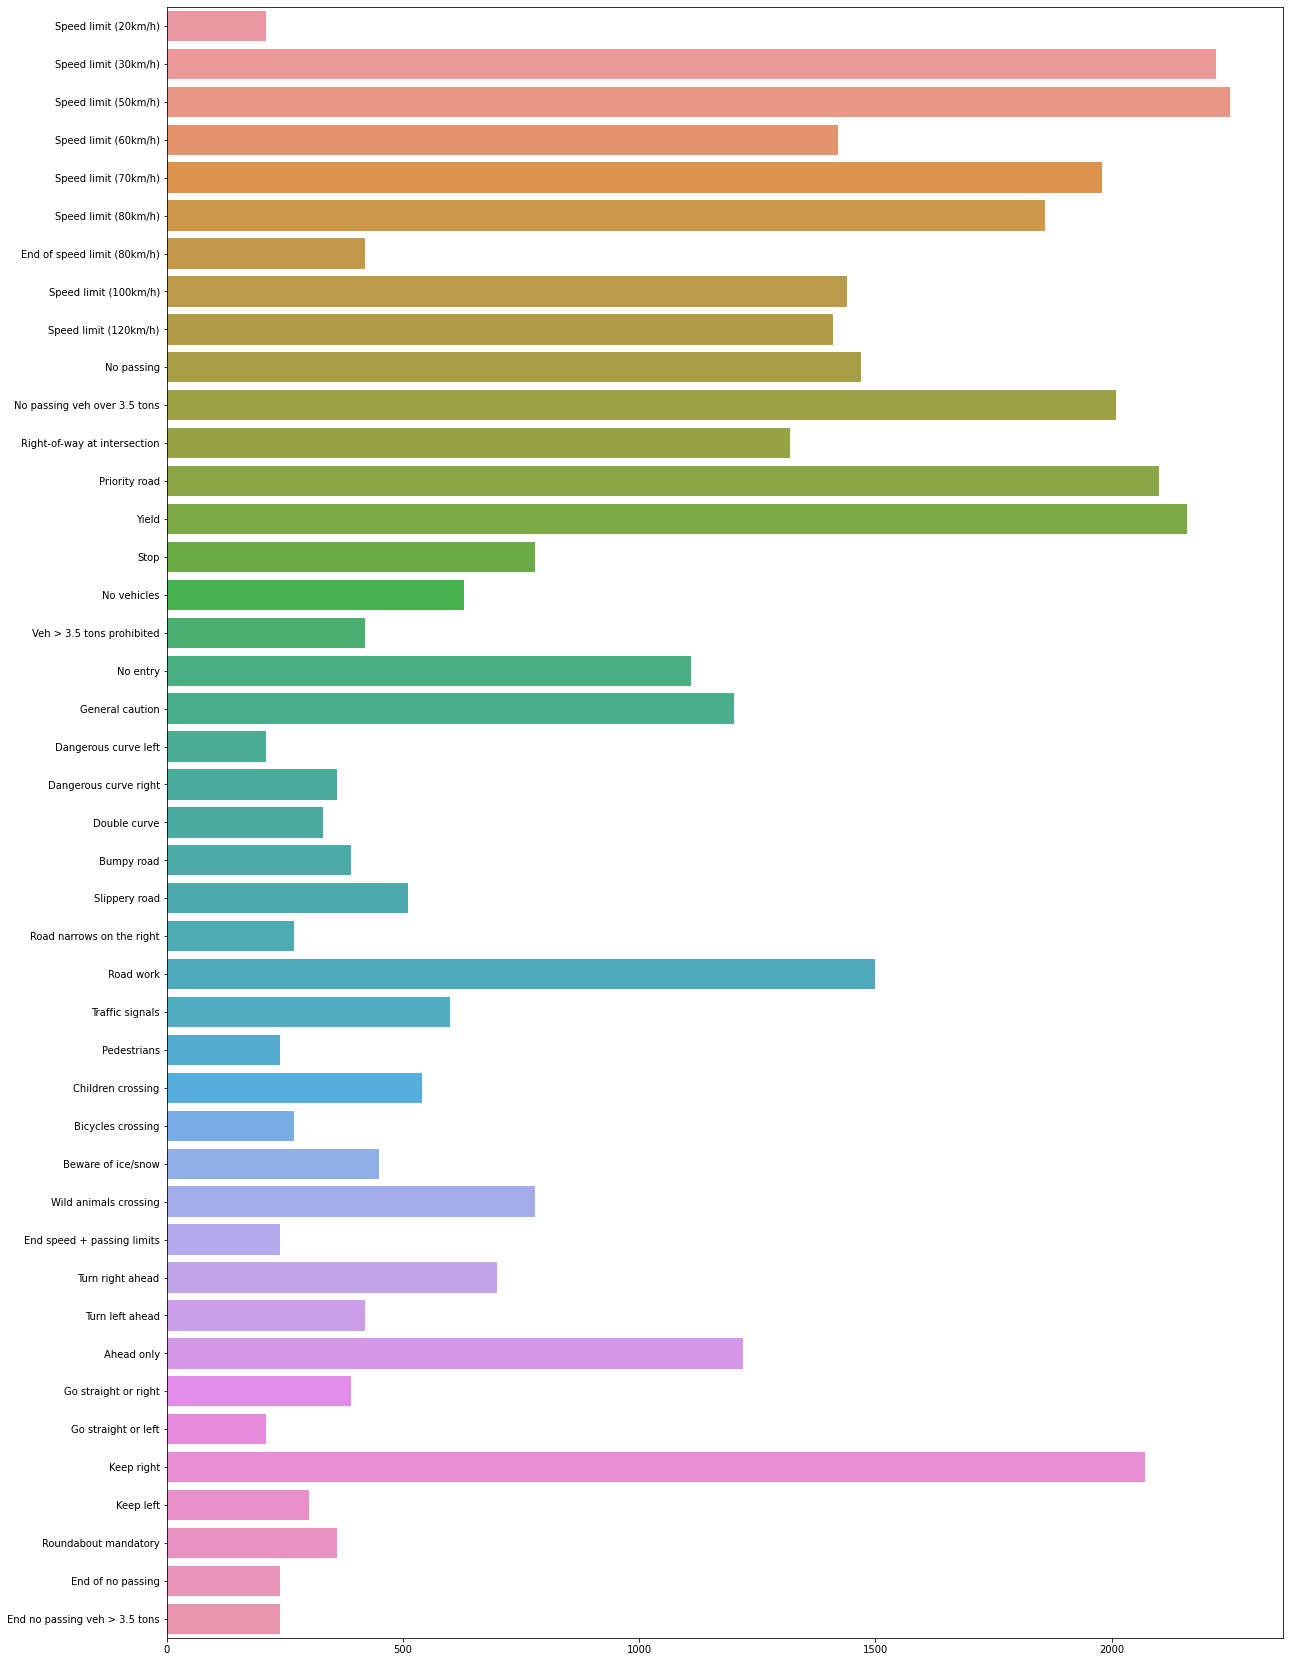

In [ ]:
#number of images belonging to each classes

num_of_imgs = dict()

for labels in range(43):
    imgs = 0
    for img in os.listdir('/content/drive/MyDrive/DBDA_PROJECT/archive/Train/' + str(labels) + '/'):
        imgs += 1
        
    num_of_imgs[df['NAME'][labels]] = imgs
    
X = list(num_of_imgs.keys())
Y = list(num_of_imgs.values())

plt.figure(figsize=(20, 30))
sns.barplot(y = X,
            x = Y
           )
 

## **Loading Dataset.**

In [ ]:
datagen = ImageDataGenerator()

In [ ]:
data = datagen.flow_from_directory('/content/drive/MyDrive/DBDA_PROJECT/archive/Train/',
                                    target_size=(32, 32),
                                    batch_size=39249,
                                    class_mode='categorical',
                                    shuffle=True,
                                    seed=42)

Found 39249 images belonging to 43 classes.


In [ ]:
X , y = data.next()

In [ ]:
print(f"Data Shape   :{X.shape}\nLabels shape :{y.shape}")

Data Shape   :(39249, 32, 32, 3)
Labels shape :(39249, 43)


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# Save Labels & Data for future use
# os.mkdir('/content/drive/MyDrive/DBDA_PROJECT/training')
os.mkdir('/content/drive/MyDrive/DBDA_PROJECT/training/dir_data')
os.mkdir('/content/drive/MyDrive/DBDA_PROJECT/training/dir_target')


In [ ]:
np.save('/content/drive/MyDrive/DBDA_PROJECT/training/dir_data', X)
np.save('/content/drive/MyDrive/DBDA_PROJECT/training/dir_target', y)

In [ ]:
# Load data & Labels
X=np.load('/content/drive/MyDrive/DBDA_PROJECT/training/dir_data.npy')
y=np.load('/content/drive/MyDrive/DBDA_PROJECT/training/dir_target.npy')

In [ ]:
print(f"Data Shape   :{X.shape}\nLabels shape :{y.shape}")

Data Shape   :(39249, 32, 32, 3)
Labels shape :(39249, 43)



# **Spliting Data**



In [ ]:
X_train_m, X_test, y_train_m, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Train Shape: {}\nTest Shape : {}".format(X_train_m.shape, X_test.shape))


Train Shape: (31399, 32, 32, 3)
Test Shape : (7850, 32, 32, 3)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_m, y_train_m, test_size=0.2, random_state=42)

In [ ]:
print("X_Train Shape: {}\nX_Validation Shape : {}".format(X_train.shape, X_val.shape))

X_Train Shape: (25119, 32, 32, 3)
X_Validation Shape : (6280, 32, 32, 3)


In [ ]:
print("y_Train Shape: {}\ny_Validation Shape : {}".format(y_train.shape, y_val.shape))

y_Train Shape: (25119, 43)
y_Validation Shape : (6280, 43)


# Preprocess

### 1.   Gaussian noise




In [ ]:
import random

In [ ]:
import cv2

def add_gaussian_noise(X_imgs):
    gaussian_noise_imgs = []
    row, col, _ = X_imgs[0].shape
    # Gaussian distribution parameters
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    
    for X_img in X_imgs:
        gaussian = np.random.random((row, col, 1)).astype(np.float32)
        gaussian = np.concatenate((gaussian, gaussian, gaussian), axis = 2)
        gaussian_img = cv2.addWeighted(X_img, 0.75, 0.25 * gaussian, 0.25, 0)
        gaussian_noise_imgs.append(gaussian_img)
    gaussian_noise_imgs = np.array(gaussian_noise_imgs, dtype = np.float32)
    return gaussian_noise_imgs
  
# x_test_gaussion = add_gaussian_noise(X_imgs)

In [ ]:
x_test_gaussion=add_gaussian_noise(X_test)

In [ ]:
len(x_test_gaussion)

7850

In [ ]:
d=random.choice(x_test_gaussion)

In [ ]:
d

array([[[ 23.30492 ,  22.55492 ,  21.80492 ],
        [ 24.77128 ,  24.02128 ,  24.02128 ],
        [ 27.772999,  28.522999,  26.272999],
        ...,
        [191.30975 , 191.30975 , 191.30975 ],
        [191.27231 , 191.27231 , 191.27231 ],
        [191.30876 , 191.30876 , 191.30876 ]],

       [[ 71.25461 ,  67.50461 ,  66.75461 ],
        [ 59.255157,  39.755157,  36.005157],
        [ 55.5107  ,  49.5107  ,  45.0107  ],
        ...,
        [191.30916 , 191.30916 , 191.30916 ],
        [191.31226 , 191.31226 , 191.31226 ],
        [191.27081 , 191.27081 , 191.27081 ]],

       [[ 97.55236 ,  68.30236 ,  67.55236 ],
        [ 23.279474,  24.779474,  22.529474],
        [ 44.29835 ,  37.54835 ,  37.54835 ],
        ...,
        [183.77226 , 184.52226 , 191.27226 ],
        [191.28796 , 191.28796 , 191.28796 ],
        [191.2577  , 191.2577  , 191.2577  ]],

       ...,

       [[ 44.259357,  39.009357,  35.259357],
        [168.81035 , 145.56035 , 156.06035 ],
        [101.25964 , 1

In [ ]:
plt.show()

[]

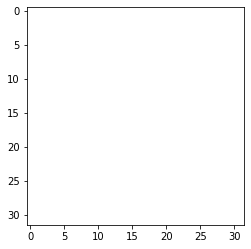

In [ ]:
plt.figure()
plt.imshow(d) 
plt.plot()  # display it

# Build model for unbalanced data using CNN


## Model 1 CNN





In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [ ]:
epochs = 25
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/25
393/393 [==============================] - 15s 8ms/step - loss: 2.6412 - accuracy: 0.3915 - val_loss: 0.8966 - val_accuracy: 0.7941
Epoch 2/25
393/393 [==============================] - 3s 6ms/step - loss: 1.1307 - accuracy: 0.6760 - val_loss: 0.5327 - val_accuracy: 0.8591
Epoch 3/25
393/393 [==============================] - 3s 7ms/step - loss: 0.8202 - accuracy: 0.7575 - val_loss: 0.3661 - val_accuracy: 0.9022
Epoch 4/25
393/393 [==============================] - 3s 6ms/step - loss: 0.6978 - accuracy: 0.7851 - val_loss: 0.3159 - val_accuracy: 0.9057
Epoch 5/25
393/393 [==============================] - 3s 6ms/step - loss: 0.5951 - accuracy: 0.8181 - val_loss: 0.2353 - val_accuracy: 0.9291
Epoch 6/25
393/393 [==============================] - 3s 6ms/step - loss: 0.5568 - accuracy: 0.8243 - val_loss: 0.2549 - val_accuracy: 0.9283
Epoch 7/25
393/393 [==============================] - 3s 7ms/step - loss: 0.5062 - accuracy: 0.8440 - val_loss: 0.2191 - val_accuracy: 0.9369
Epoch

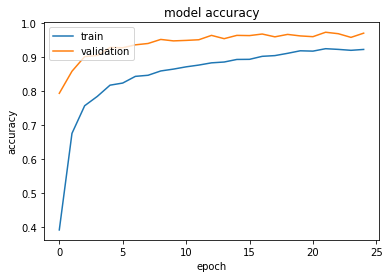

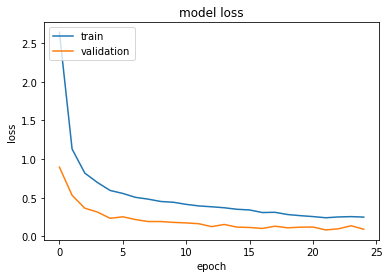

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Testing on Test Set

In [ ]:
Y_pred = np.argmax(model.predict(x_test_gaussion), axis=1)

In [ ]:
Y_pred

array([23, 25, 27, ..., 23, 41,  9])

In [ ]:
# Classification metrics can't handle a mix of multilabel-indicator and multiclass targets
y_test_arg=np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_arg, Y_pred))

0.9629299363057325


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        36
           1       0.97      0.90      0.93       454
           2       1.00      0.99      0.99       439
           3       0.94      0.99      0.96       265
           4       0.99      1.00      0.99       421
           5       0.98      1.00      0.99       432
           6       1.00      1.00      1.00       162
           7       0.91      0.99      0.95       117
           8       0.96      1.00      0.98        81
           9       1.00      1.00      1.00       227
          10       0.96      0.98      0.97       246
          11       0.95      0.93      0.94        42
          12       0.97      0.87      0.92       454
          13       0.92      0.98      0.95        57
          14       1.00      0.82      0.90        68
          15       0.96      1.00      0.98        82
          16       0.99      0.91      0.95        94
          17       0.94    

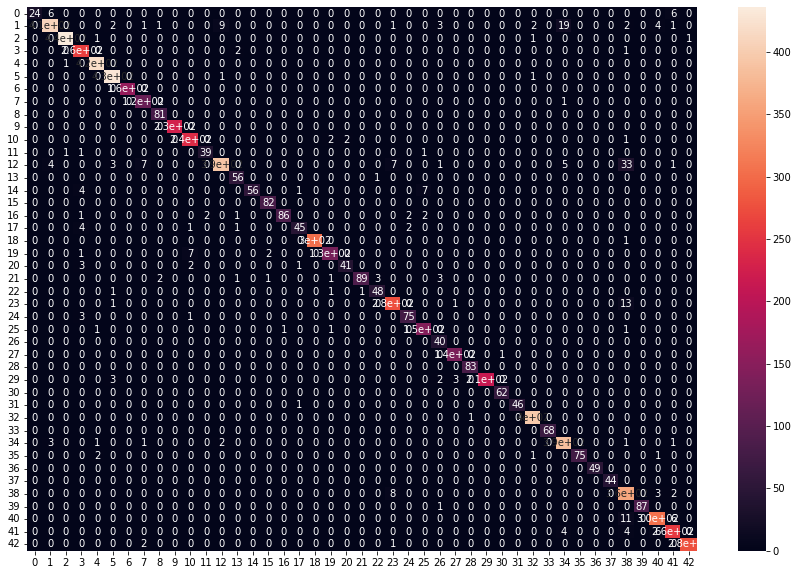

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns
cm = metrics.confusion_matrix(y_test_arg, Y_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True,)
plt.show()

In [ ]:
# class-wise accuracy

In [ ]:
CLASS_ID = df_Traffic['CLASS_ID'].tolist()

In [ ]:
classwise_acc = cm.diagonal()/cm.sum(axis=1) * 100

In [ ]:
imbalance_cnn_acc1=classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': imbalance_cnn_acc1}, columns = ['Class_Label', 'Accuracy'])

In [ ]:
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

Class_Label,Accuracy
0,66.67
1,90.09
2,99.32
3,98.87
4,99.76
5,99.54
6,100.00
7,99.15
8,100.00
9,100.00


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg, Y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg, Y_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg, Y_pred,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg, Y_pred,average='weighted')
print('F1 score: %f' % f1)


Accuracy: 0.962930
Precision: 0.964501
Recall: 0.962930
F1 score: 0.962771


In [ ]:
mod="imbalanced_cnn"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df

,Model,Accuracy,Precision,Recall,F1 Score
0,imbalanced_cnn,0.9629299363057325,0.9645008113924055,0.9629299363057325,0.9627711856207994


In [ ]:
# saving the dataframe
df.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_cnn1.csv',encoding = 'utf-8-sig')

In [ ]:
# saving the model
model.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_cnn.h5")

In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg, y_pred =  Y_pred, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_cnn.csv', index= True)


## model 2 - ResNet50 with 152 layers


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights=None,
    input_shape=(32,32, 3),
)

In [ ]:
#taking 152th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[152].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model1 = Model(inputs = resnet_preTrained.input, outputs = output)
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

#compiling the model
model1.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:

#callbacks
checkpoint = ModelCheckpoint('./best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)



In [ ]:
#training the model
n_epochs = 25
history1 =  model1.fit(X_train, y_train,  batch_size = 256, validation_data = (X_val, y_val),epochs = n_epochs, verbose = 1)


Epoch 1/25
99/99 [==============================] - 15s 86ms/step - loss: 1.7572 - accuracy: 0.4942 - val_loss: 2.5777 - val_accuracy: 0.3030
Epoch 2/25
99/99 [==============================] - 7s 69ms/step - loss: 0.4834 - accuracy: 0.8445 - val_loss: 1.0300 - val_accuracy: 0.7006
Epoch 3/25
99/99 [==============================] - 7s 68ms/step - loss: 0.2286 - accuracy: 0.9265 - val_loss: 0.6061 - val_accuracy: 0.8159
Epoch 4/25
99/99 [==============================] - 7s 69ms/step - loss: 0.1525 - accuracy: 0.9502 - val_loss: 0.3619 - val_accuracy: 0.8893
Epoch 5/25
99/99 [==============================] - 7s 69ms/step - loss: 0.1110 - accuracy: 0.9646 - val_loss: 0.3142 - val_accuracy: 0.9123
Epoch 6/25
99/99 [==============================] - 8s 79ms/step - loss: 0.0950 - accuracy: 0.9691 - val_loss: 0.1684 - val_accuracy: 0.9508
Epoch 7/25
99/99 [==============================] - 7s 73ms/step - loss: 0.0613 - accuracy: 0.9808 - val_loss: 0.4828 - val_accuracy: 0.8707
Epoch 8/25
9

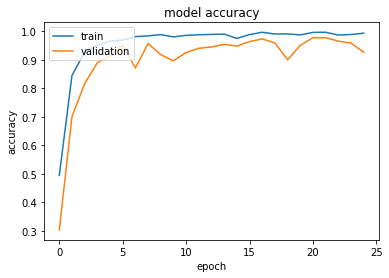

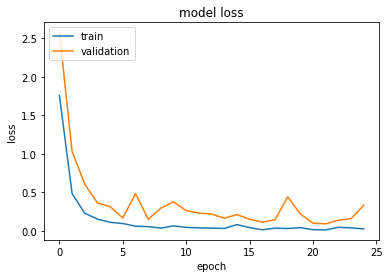

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
results = model1.evaluate(X_val, y_val, batch_size=256)
# results = model.evaluate(X_test, y_test)

25/25 [==============================] - 1s 21ms/step - loss: 0.3326 - accuracy: 0.9263


In [ ]:
Y_pred_rn = np.argmax(model1.predict(x_test_gaussion), axis=1)

In [ ]:
Y_pred_rn

array([23, 25, 27, ..., 23, 41,  9])

In [ ]:
y_test_arg_rn=np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(y_test_arg_rn, Y_pred_rn))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.93      0.97      0.95       454
           2       1.00      0.96      0.98       439
           3       0.84      1.00      0.91       265
           4       0.97      1.00      0.98       421
           5       0.99      0.98      0.99       432
           6       0.90      0.99      0.95       162
           7       0.91      0.97      0.94       117
           8       0.94      0.99      0.96        81
           9       1.00      0.97      0.98       227
          10       0.96      0.99      0.97       246
          11       1.00      0.62      0.76        42
          12       0.95      0.89      0.92       454
          13       1.00      0.70      0.82        57
          14       1.00      0.60      0.75        68
          15       1.00      0.90      0.95        82
          16       0.96      0.68      0.80        94
          17       0.83    

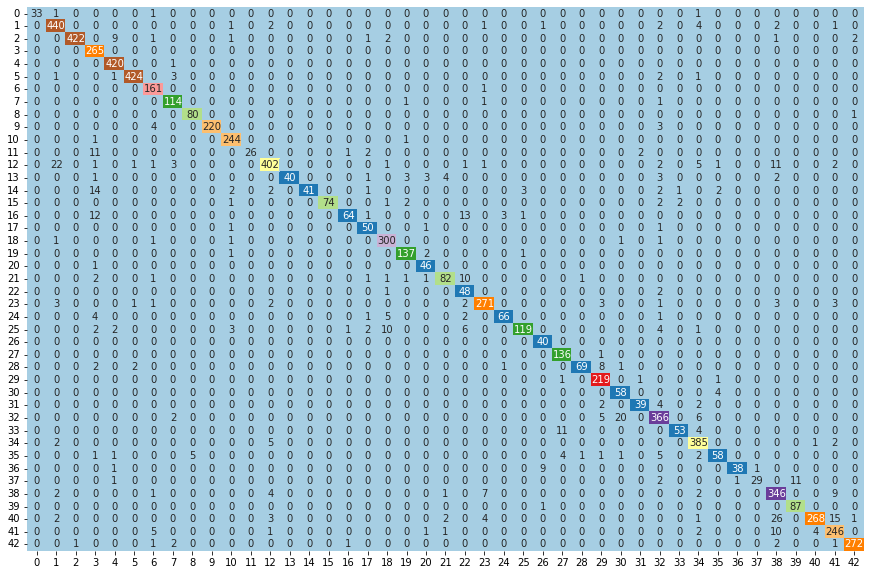

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm2 = metrics.confusion_matrix(y_test_arg_rn, Y_pred_rn)
plt.figure(figsize=(15,10))
sns.heatmap(cm2, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
CLASS_ID = df_Traffic['CLASS_ID'].tolist()
classwise_acc = cm2.diagonal()/cm2.sum(axis=1) * 100
imbalanced_ResNet50_152_acc2 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': imbalanced_ResNet50_152_acc2}, columns = ['Class_Label', 'Accuracy'])

In [ ]:
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='pink')

Class_Label,Accuracy
0,80.56
1,95.37
2,99.54
3,98.11
4,100.00
5,100.00
6,98.15
7,99.15
8,98.77
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_rn, Y_pred_rn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_rn, Y_pred_rn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_rn, Y_pred_rn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_rn, Y_pred_rn,average='weighted')
print('F1 score: %f' % f1)


Accuracy: 0.929682
Precision: 0.934647
Recall: 0.929682
F1 score: 0.928872


In [ ]:
mod="imbalanced_ResNet50_152"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df2 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df2

,Model,Accuracy,Precision,Recall,F1 Score
0,imbalanced_ResNet50_152,0.9296815286624204,0.9346466960397084,0.9296815286624204,0.9288721292928734


In [ ]:
# saving the dataframe
df2.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_resnet50.csv',encoding = 'utf-8-sig')

In [ ]:
# Saving the model
model1.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_RESNET_152.h5")

In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg_rn, y_pred = Y_pred_rn, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_RESNET_152.csv', index= True)

### Model 3- Imbalanced ResNet50 with 50 layers

In [ ]:
# ResNet with 50 layers

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32, 3),
)

In [ ]:
#taking 50th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[50].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model2 = Model(inputs = resnet_preTrained.input, outputs = output)
model2.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_9[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

#compiling the model
model2.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#training the model
n_epochs = 25
history2 =  model2.fit(X_train, y_train,  batch_size = 256, validation_data = (X_val, y_val), epochs = n_epochs, verbose = 1)

Epoch 1/25
99/99 [==============================] - 5s 31ms/step - loss: 0.6830 - accuracy: 0.8257 - val_loss: 1.4629 - val_accuracy: 0.6901
Epoch 2/25
99/99 [==============================] - 3s 26ms/step - loss: 0.0540 - accuracy: 0.9832 - val_loss: 0.1525 - val_accuracy: 0.9524
Epoch 3/25
99/99 [==============================] - 3s 26ms/step - loss: 0.0351 - accuracy: 0.9893 - val_loss: 0.0659 - val_accuracy: 0.9799
Epoch 4/25
99/99 [==============================] - 3s 27ms/step - loss: 0.0152 - accuracy: 0.9956 - val_loss: 0.0940 - val_accuracy: 0.9701
Epoch 5/25
99/99 [==============================] - 3s 28ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0927 - val_accuracy: 0.9731
Epoch 6/25
99/99 [==============================] - 3s 26ms/step - loss: 0.0162 - accuracy: 0.9955 - val_loss: 0.0777 - val_accuracy: 0.9768
Epoch 7/25
99/99 [==============================] - 3s 26ms/step - loss: 0.0147 - accuracy: 0.9957 - val_loss: 0.0879 - val_accuracy: 0.9764
Epoch 8/25
99

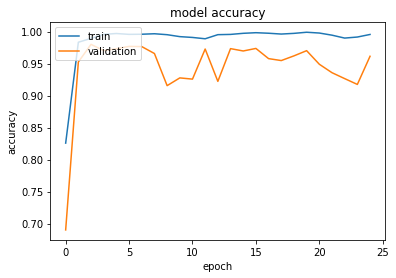

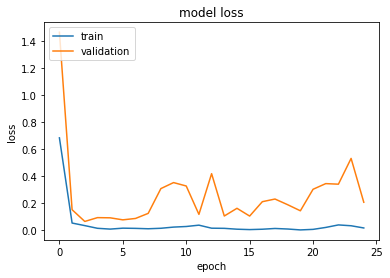

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_rs = np.argmax(model2.predict(x_test_gaussion), axis=1)

In [ ]:
Y_pred_rs

array([23, 25, 27, ..., 23, 41,  9])

In [ ]:
y_test_arg_rs=np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(y_test_arg_rs, Y_pred_rs))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.97      0.98      0.97       454
           2       0.99      0.97      0.98       439
           3       0.79      1.00      0.88       265
           4       0.99      1.00      1.00       421
           5       0.98      1.00      0.99       432
           6       0.98      1.00      0.99       162
           7       0.94      0.98      0.96       117
           8       1.00      0.98      0.99        81
           9       1.00      1.00      1.00       227
          10       0.93      0.99      0.96       246
          11       0.97      0.86      0.91        42
          12       0.97      0.98      0.97       454
          13       0.96      0.95      0.96        57
          14       0.79      0.96      0.87        68
          15       0.98      0.96      0.97        82
          16       1.00      0.62      0.76        94
          17       0.88    

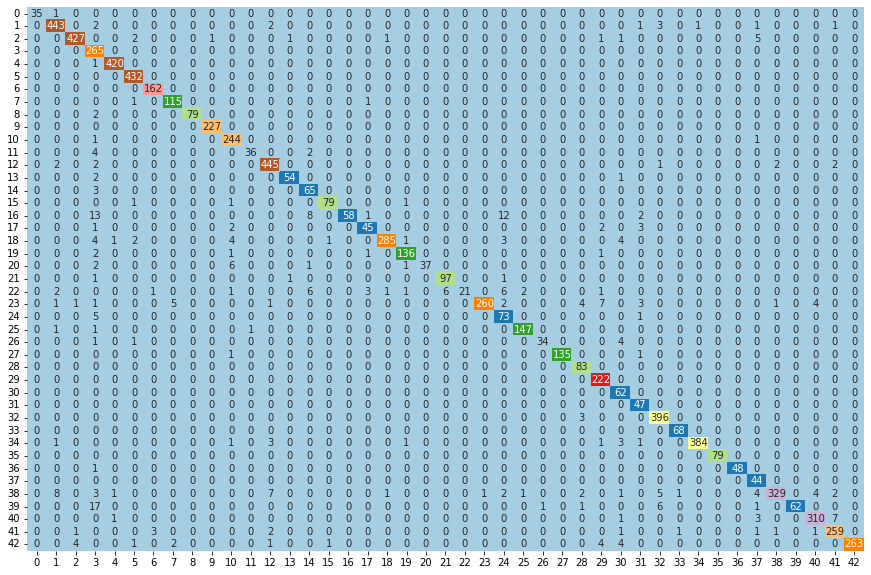

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm3 = metrics.confusion_matrix(y_test_arg_rs, Y_pred_rs)
plt.figure(figsize=(15,10))
sns.heatmap(cm3, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm3.diagonal()/cm3.sum(axis=1) * 100
imbalanced_ResNet_L50_acc3 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': imbalanced_ResNet_L50_acc3}, columns = ['Class_Label', 'Accuracy'])

In [ ]:
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

Class_Label,Accuracy
0,97.22
1,97.58
2,97.27
3,100.00
4,99.76
5,100.00
6,100.00
7,98.29
8,97.53
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_rs, Y_pred_rs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_rs, Y_pred_rs,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_rs, Y_pred_rs,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_rs, Y_pred_rs,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.994904
Precision: 0.994942
Recall: 0.994904
F1 score: 0.994906


In [ ]:
mod="imbalanced_ResNet_L50"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df3 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df3

,Model,Accuracy,Precision,Recall,F1 Score
0,imbalanced_ResNet_L50,0.9949044585987261,0.9949419639411615,0.9949044585987261,0.9949057205466408


In [ ]:
# saving the dataframe
df3.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_resnet_L50.csv',encoding = 'utf-8-sig')

In [ ]:
# Saving the model
model2.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_RESNET_L50.h5")

In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg_rs,  y_pred = Y_pred_rs, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_resnet_L50.csv', index= True)

# **Handel imbalance data**

# 1- using SMOTE: Synthetic Minority Over-sampling Technique


In [ ]:
# SMOTE expected array <= 2, but we have 4 dim so reshaping it.
X1 = X.reshape(39249, 32*32*3, order ='a')

In [ ]:
X1.shape

(39249, 3072)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)

X_smote, y_smote = sm.fit_resample(X1, y)

In [ ]:
X_smote.shape, y_smote.shape

((96750, 3072), (96750, 43))

In [ ]:
X_train_S, X_test_s, y_train_S, y_test_s = train_test_split(X_smote, y_smote, test_size=0.2, random_state=0)

In [ ]:
print("Using SMOTE")
print("X_Train Shape: ",X_train_S.shape,"\nX_test shape: ",X_test_s.shape,"\ny_train shape: ",y_train_S.shape,"\ny_Test Shape : ",y_test_s.shape)

Using SMOTE
X_Train Shape:  (77400, 3072) 
X_test shape:  (19350, 3072) 
y_train shape:  (77400, 43) 
y_Test Shape :  (19350, 43)


In [ ]:
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_train_S, y_train_S, test_size=0.2, random_state=0)

In [ ]:
print("validation split")
print("X_Train Shape: ",X_train_s.shape,"\nX_validation shape: ",X_val_s.shape,"\ny_train shape: ",y_train_s.shape,"\ny_validation Shape : ",y_val_s.shape)

validation split
X_Train Shape:  (61920, 3072) 
X_validation shape:  (15480, 3072) 
y_train shape:  (61920, 43) 
y_validation Shape :  (15480, 43)


In [ ]:
X_val_s.shape,y_val_s.shape,X_train_s.shape, y_train_s.shape

((15480, 3072), (15480, 43), (61920, 3072), (61920, 43))

In [ ]:
# cnn expecting 4 dim, so again reshape to orignal
X_train_s = X_train_s.reshape(X_train_s.shape[0],32,32,3)
X_val_s = X_val_s.reshape(X_val_s.shape[0],32,32,3)
X_test_s = X_test_s.reshape(X_test_s.shape[0],32,32,3)

In [ ]:
X_val_s.shape,X_train_s.shape

((15480, 32, 32, 3), (61920, 32, 32, 3))

### Add Gausian noise

In [ ]:
import cv2

def add_gaussian_noise(X_imgs):
    gaussian_noise_imgs = []
    row, col, _ = X_imgs[0].shape
    # Gaussian distribution parameters
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    
    for X_img in X_imgs:
        gaussian = np.random.random((row, col, 1)).astype(np.float32)
        gaussian = np.concatenate((gaussian, gaussian, gaussian), axis = 2)
        gaussian_img = cv2.addWeighted(X_img, 0.75, 0.25 * gaussian, 0.25, 0)
        gaussian_noise_imgs.append(gaussian_img)
    gaussian_noise_imgs = np.array(gaussian_noise_imgs, dtype = np.float32)
    return gaussian_noise_imgs
  
# gaussian_noise_imgs = add_gaussian_noise(X_imgs)

In [ ]:
x_test_s_gaussion=add_gaussian_noise(X_test_s)

In [ ]:
len(x_test_s_gaussion)

19350

In [ ]:
d=random.choice(x_test_gaussion)

In [ ]:
plt.figure()
plt.imshow(d) 
plt.plot() 

In [ ]:
# BUILDING A MODEL

## Model 4 - CNN Using SMOTE

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                      

In [ ]:
epochs = 25
history_sMOTE_CNN = model.fit(X_train_s, y_train_s, batch_size=64, epochs=epochs, validation_data=(X_val_s, y_val_s))

Epoch 1/25
968/968 [==============================] - 7s 7ms/step - loss: 1.2456 - accuracy: 0.6754 - val_loss: 0.1471 - val_accuracy: 0.9604
Epoch 2/25
968/968 [==============================] - 7s 8ms/step - loss: 0.2699 - accuracy: 0.9230 - val_loss: 0.0642 - val_accuracy: 0.9844
Epoch 3/25
968/968 [==============================] - 9s 10ms/step - loss: 0.1830 - accuracy: 0.9474 - val_loss: 0.0479 - val_accuracy: 0.9882
Epoch 4/25
968/968 [==============================] - 11s 11ms/step - loss: 0.1726 - accuracy: 0.9506 - val_loss: 0.0471 - val_accuracy: 0.9876
Epoch 5/25
968/968 [==============================] - 6s 6ms/step - loss: 0.1542 - accuracy: 0.9577 - val_loss: 0.0480 - val_accuracy: 0.9877
Epoch 6/25
968/968 [==============================] - 7s 7ms/step - loss: 0.1422 - accuracy: 0.9614 - val_loss: 0.0481 - val_accuracy: 0.9861
Epoch 7/25
968/968 [==============================] - 7s 7ms/step - loss: 0.1362 - accuracy: 0.9634 - val_loss: 0.0381 - val_accuracy: 0.9904
Epo

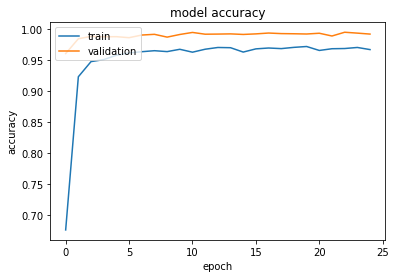

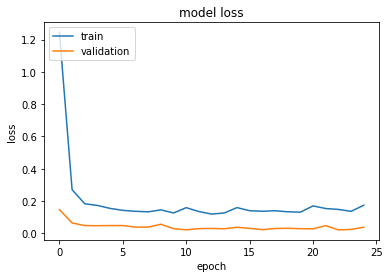

In [ ]:
# summarize history for accuracy
plt.plot(history_sMOTE_CNN.history['accuracy'])
plt.plot(history_sMOTE_CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_sMOTE_CNN.history['loss'])
plt.plot(history_sMOTE_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_scnn = np.argmax(model.predict(x_test_s_gaussion), axis=1)

In [ ]:
Y_pred_scnn

array([10, 18, 28, ..., 22, 20, 22])

In [ ]:
y_test_arg_scnn=np.argmax(y_test_s,axis=1)

In [ ]:
print(classification_report(y_test_arg_scnn, Y_pred_scnn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       467
           1       0.97      0.97      0.97       417
           2       1.00      0.99      1.00       462
           3       1.00      1.00      1.00       436
           4       1.00      1.00      1.00       459
           5       1.00      1.00      1.00       443
           6       1.00      1.00      1.00       475
           7       1.00      1.00      1.00       500
           8       1.00      1.00      1.00       467
           9       1.00      1.00      1.00       453
          10       1.00      0.96      0.98       444
          11       1.00      1.00      1.00       438
          12       0.97      0.94      0.95       392
          13       1.00      1.00      1.00       425
          14       1.00      1.00      1.00       466
          15       1.00      1.00      1.00       449
          16       1.00      0.99      0.99       484
          17       1.00    

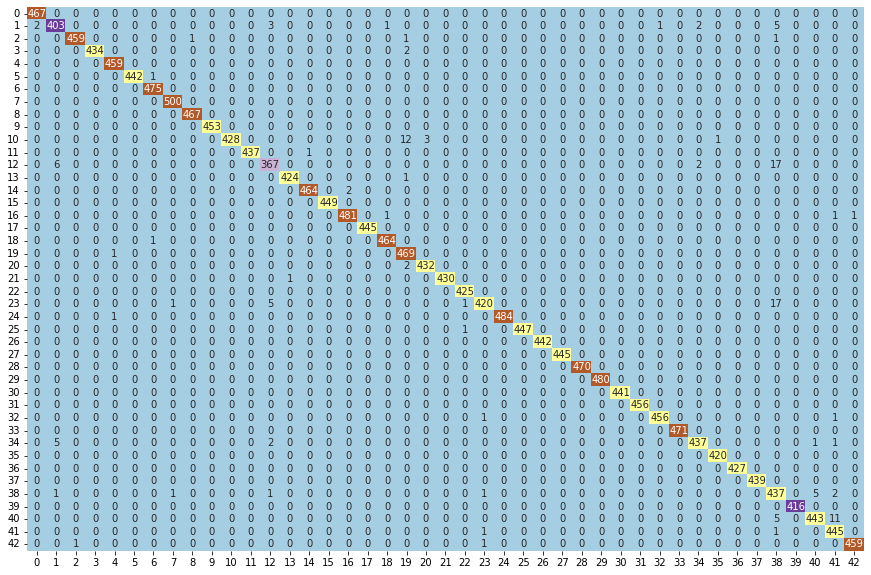

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm4 = metrics.confusion_matrix(y_test_arg_scnn, Y_pred_scnn)
plt.figure(figsize=(15,10))
sns.heatmap(cm4, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm4.diagonal()/cm4.sum(axis=1) * 100

In [ ]:
balanced_SMOTE_CNN_acc4 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_SMOTE_CNN_acc4}, columns = ['Class_Label', 'Accuracy'])


In [ ]:
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

Class_Label,Accuracy
0,100.00
1,99.12
2,99.77
3,99.25
4,99.76
5,100.00
6,99.38
7,100.00
8,100.00
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_scnn, Y_pred_scnn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_scnn, Y_pred_scnn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_scnn, Y_pred_scnn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_scnn, Y_pred_scnn,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.992713
Precision: 0.992902
Recall: 0.992713
F1 score: 0.992733


In [ ]:
mod="balanced_SMOTE_CNN"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df4 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df4

,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_SMOTE_CNN,0.9927131782945736,0.9929022375654191,0.9927131782945736,0.9927334755694855


In [ ]:
# saving the dataframe
df4.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_CNN.csv',encoding = 'utf-8-sig')

In [ ]:
# Saving the model
model.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_CNN.h5")

In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg_scnn,  y_pred = Y_pred_scnn, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_CNN.csv', index= True)

## Model 5 - ResNet50 152 layer using SMOTE

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights=None,
    input_shape=(32,32, 3),
)

In [ ]:
#taking 152th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[152].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model5 = Model(inputs = resnet_preTrained.input, outputs = output)
model5.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [ ]:
#compiling the model
model5.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#training the model
n_epochs = 25
history5 =  model5.fit(X_train_s, y_train_s,  batch_size = 256, validation_data = (X_val_s, y_val_s), epochs = n_epochs, verbose = 1)


Epoch 1/25
242/242 [==============================] - 23s 81ms/step - loss: 0.8262 - accuracy: 0.7606 - val_loss: 0.8554 - val_accuracy: 0.7759
Epoch 2/25
242/242 [==============================] - 18s 74ms/step - loss: 0.1364 - accuracy: 0.9566 - val_loss: 0.2146 - val_accuracy: 0.9383
Epoch 3/25
242/242 [==============================] - 17s 70ms/step - loss: 0.0772 - accuracy: 0.9758 - val_loss: 0.2956 - val_accuracy: 0.9150
Epoch 4/25
242/242 [==============================] - 19s 78ms/step - loss: 0.0565 - accuracy: 0.9823 - val_loss: 0.2729 - val_accuracy: 0.9285
Epoch 5/25
242/242 [==============================] - 19s 79ms/step - loss: 0.0444 - accuracy: 0.9863 - val_loss: 0.2024 - val_accuracy: 0.9448
Epoch 6/25
242/242 [==============================] - 17s 69ms/step - loss: 0.0366 - accuracy: 0.9888 - val_loss: 0.2438 - val_accuracy: 0.9357
Epoch 7/25
242/242 [==============================] - 17s 69ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0782 - val_accuracy:

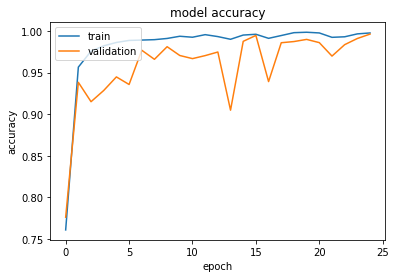

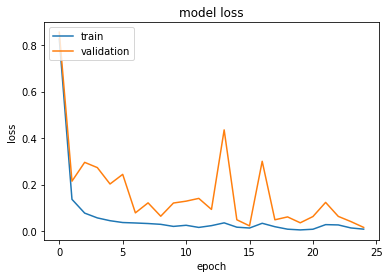

In [ ]:
# summarize history for accuracy
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
Y_pred_SM_rn = np.argmax(model5.predict(x_test_s_gaussion), axis=1)

In [ ]:
Y_pred_SM_rn

array([10, 18, 28, ..., 22, 20, 22])

In [ ]:
y_test_arg_SM_rn=np.argmax(y_test_s,axis=1)

In [ ]:
print(classification_report(y_test_arg_SM_rn, Y_pred_SM_rn))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       467
           1       0.98      0.96      0.97       417
           2       1.00      0.99      1.00       462
           3       0.99      1.00      0.99       436
           4       1.00      1.00      1.00       459
           5       1.00      1.00      1.00       443
           6       1.00      1.00      1.00       475
           7       1.00      1.00      1.00       500
           8       0.99      1.00      1.00       467
           9       1.00      1.00      1.00       453
          10       1.00      1.00      1.00       444
          11       1.00      1.00      1.00       438
          12       0.97      0.96      0.97       392
          13       1.00      0.99      0.99       425
          14       0.99      1.00      1.00       466
          15       1.00      1.00      1.00       449
          16       1.00      1.00      1.00       484
          17       1.00    

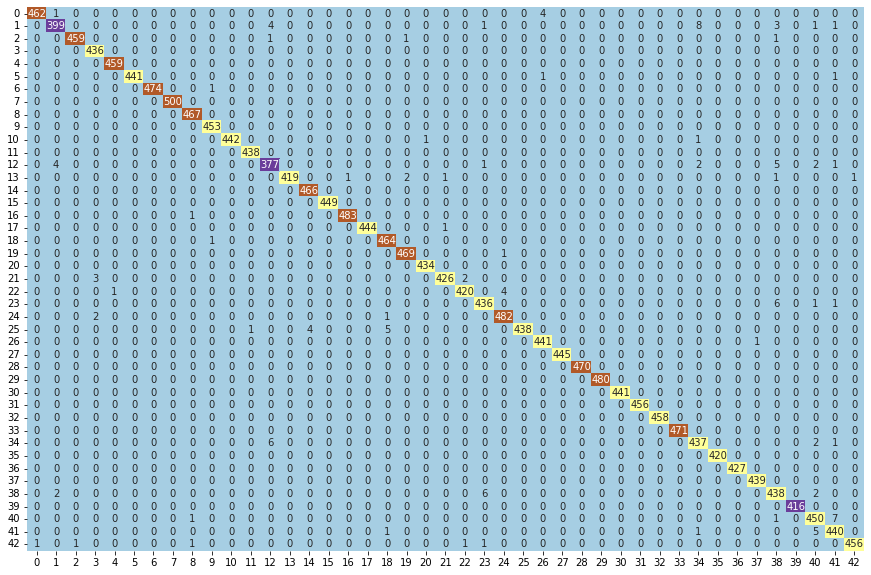

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm5 = metrics.confusion_matrix(y_test_arg_SM_rn, Y_pred_SM_rn)
plt.figure(figsize=(15,10))
sns.heatmap(cm5, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm5.diagonal()/cm5.sum(axis=1) * 100
balanced_SMOTE_ResNet_152_acc5 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_SMOTE_ResNet_152_acc5}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='blue')

Class_Label,Accuracy
0,98.93
1,95.68
2,99.35
3,100.00
4,100.00
5,99.55
6,99.79
7,100.00
8,100.00
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_SM_rn, Y_pred_SM_rn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_SM_rn, Y_pred_SM_rn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_SM_rn, Y_pred_SM_rn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_SM_rn, Y_pred_SM_rn,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.993385
Precision: 0.993413
Recall: 0.993385
F1 score: 0.993383


In [ ]:
mod="balanced_SMOTE_ResNet_152"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df5 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df5

,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_SMOTE_ResNet_152,0.9933850129198967,0.9934133825190726,0.9933850129198967,0.9933831825837814


In [ ]:
# saving the dataframe
df5.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_ResNet_152.csv',encoding = 'utf-8-sig')

In [ ]:
# Saving the model
model5.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_ResNet_152.h5")


In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_SM_rn,  y_pred =  Y_pred_SM_rn, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_ResNet_152.csv', index= True)

In [ ]:
# ResNet with 50 layer 

## Model 6- ResNet50 50 Layer using SMOTE

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32, 3),
)


In [ ]:

#taking 50th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[50].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model6 = Model(inputs = resnet_preTrained.input, outputs = output)
model6.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [ ]:
#compiling the model
model6.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#training the model
n_epochs = 25
history6 =  model6.fit(X_train_s, y_train_s,  batch_size = 256, validation_data = (X_val_s, y_val_s), epochs = n_epochs, verbose = 1)


Epoch 1/25
242/242 [==============================] - 9s 30ms/step - loss: 0.2623 - accuracy: 0.9307 - val_loss: 0.1818 - val_accuracy: 0.9436
Epoch 2/25
242/242 [==============================] - 6s 27ms/step - loss: 0.0280 - accuracy: 0.9917 - val_loss: 0.0955 - val_accuracy: 0.9718
Epoch 3/25
242/242 [==============================] - 6s 27ms/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.0626 - val_accuracy: 0.9808
Epoch 4/25
242/242 [==============================] - 6s 27ms/step - loss: 0.0097 - accuracy: 0.9970 - val_loss: 0.2153 - val_accuracy: 0.9433
Epoch 5/25
242/242 [==============================] - 7s 27ms/step - loss: 0.0216 - accuracy: 0.9937 - val_loss: 0.2951 - val_accuracy: 0.9361
Epoch 6/25
242/242 [==============================] - 7s 27ms/step - loss: 0.0187 - accuracy: 0.9943 - val_loss: 0.1831 - val_accuracy: 0.9609
Epoch 7/25
242/242 [==============================] - 7s 27ms/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 0.4907 - val_accuracy: 0.9032

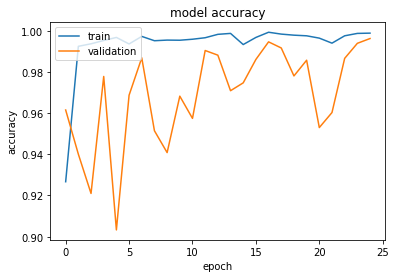

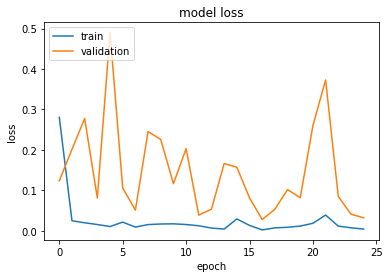

In [ ]:
# summarize history for accuracy
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
Y_pred_SMT_rn = np.argmax(model6.predict(x_test_s_gaussion), axis=1)


In [ ]:
Y_pred_SMT_rn

array([10, 18, 28, ..., 22, 20, 22])

In [ ]:
y_test_arg_SMT_rn=np.argmax(y_test_s,axis=1)


In [ ]:
print(classification_report(y_test_arg_SMT_rn, Y_pred_SMT_rn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       467
           1       0.94      0.98      0.96       417
           2       0.99      1.00      0.99       462
           3       0.97      0.98      0.98       436
           4       1.00      0.99      0.99       459
           5       1.00      0.99      0.99       443
           6       1.00      1.00      1.00       475
           7       0.99      1.00      1.00       500
           8       1.00      1.00      1.00       467
           9       0.99      1.00      1.00       453
          10       1.00      0.98      0.99       444
          11       1.00      1.00      1.00       438
          12       0.92      0.99      0.96       392
          13       0.98      1.00      0.99       425
          14       0.99      1.00      0.99       466
          15       1.00      1.00      1.00       449
          16       0.99      0.97      0.98       484
          17       1.00    

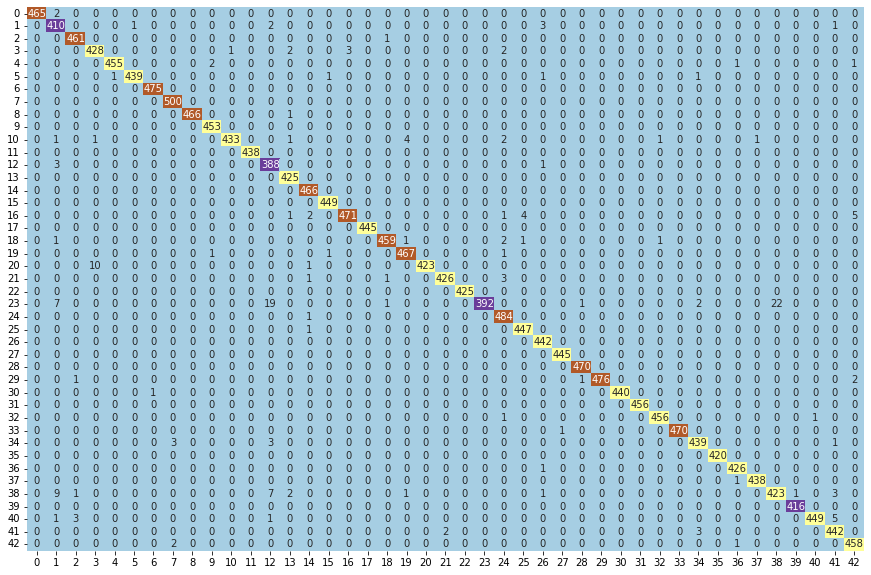

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm6 = metrics.confusion_matrix(y_test_arg_SMT_rn, Y_pred_SMT_rn)
plt.figure(figsize=(15,10))
sns.heatmap(cm6, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm6.diagonal()/cm6.sum(axis=1) * 100
balanced_SMOTE_ResNet_50_acc6 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_SMOTE_ResNet_50_acc6}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

Class_Label,Accuracy
0,99.57
1,98.32
2,99.78
3,98.17
4,99.13
5,99.10
6,100.00
7,100.00
8,99.79
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_SMT_rn, Y_pred_SMT_rn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_SMT_rn, Y_pred_SMT_rn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_SMT_rn, Y_pred_SMT_rn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_SMT_rn, Y_pred_SMT_rn,average='weighted')
print('F1 score: %f' % f1)


Accuracy: 0.989974
Precision: 0.990172
Recall: 0.989974
F1 score: 0.989934


In [ ]:
mod="balanced_SMOTE_ResNet_50"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df6 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df6

,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_SMOTE_ResNet_50,0.9899741602067184,0.9901719647239982,0.9899741602067184,0.9899335979824639


In [ ]:
# saving the dataframe
df6.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_ResNet_50.csv',encoding = 'utf-8-sig')


In [ ]:
# Saving the model
model6.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_ResNet_50.h5")


In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_SMT_rn,  y_pred =   Y_pred_SMT_rn, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_ResNet_50.csv', index= True)

# **Handeling imbalanced data**

### 2) Weighted class approch

In [ ]:
# dataset prepration

In [ ]:
# X_train, X_val, y_train, y_val = imbalanced dataset

In [ ]:
from sklearn.utils import class_weight


In [ ]:
cls_wt = class_weight.compute_class_weight('balanced', 
                                           classes=np.unique(np.argmax(y_train, axis=1)), 
                                           y=np.argmax(y_train, axis=1))



In [ ]:
class_weight_dict = dict(enumerate(cls_wt))

In [ ]:
class_weight_dict


{0: 4.233063700707786,
 1: 0.4217781882293678,
 2: 0.46958423689523665,
 3: 0.7029636470489463,
 4: 0.4333551859775033,
 5: 0.42330637007077854,
 6: 1.1801268498942918,
 7: 1.4178708512079476,
 8: 2.2554547903385114,
 9: 0.8453875408070541,
 10: 0.7518182634461704,
 11: 4.263961975895434,
 12: 0.409651325874947,
 13: 2.318106312292359,
 14: 2.6919944271782232,
 15: 2.3554951237809454,
 16: 1.7489903913104023,
 17: 3.540380549682875,
 18: 0.6016094651881302,
 19: 1.5495034236012584,
 20: 3.7207821063546143,
 21: 1.6834662556128945,
 22: 3.416156670746634,
 23: 0.6469133894769373,
 24: 1.8843960990247561,
 25: 1.1409429505813953,
 26: 3.3766635300443606,
 27: 1.3246321784527764,
 28: 2.131980987947717,
 29: 0.7403837651428066,
 30: 2.2296289721285283,
 31: 4.425475687103594,
 32: 0.4327131782945736,
 33: 3.227418733136323,
 34: 0.45960880464018444,
 35: 2.5734043643069358,
 36: 3.628340314892388,
 37: 3.894418604651163,
 38: 0.4946340310733907,
 39: 2.1961007169085502,
 40: 0.64691338947

In [ ]:
import cv2

def add_gaussian_noise(X_imgs):
    gaussian_noise_imgs = []
    row, col, _ = X_imgs[0].shape
    # Gaussian distribution parameters
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    
    for X_img in X_imgs:
        gaussian = np.random.random((row, col, 1)).astype(np.float32)
        gaussian = np.concatenate((gaussian, gaussian, gaussian), axis = 2)
        gaussian_img = cv2.addWeighted(X_img, 0.75, 0.25 * gaussian, 0.25, 0)
        gaussian_noise_imgs.append(gaussian_img)
    gaussian_noise_imgs = np.array(gaussian_noise_imgs, dtype = np.float32)
    return gaussian_noise_imgs
  
# gaussian_noise_imgs = add_gaussian_noise(X_imgs)

In [ ]:
x_test_wt_gaussion=add_gaussian_noise(X_test)

In [ ]:
len(x_test_wt_gaussion)

7850

## Model 7- CNN with weight-class approch

In [ ]:
model7 = Sequential()
model7.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model7.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model7.add(MaxPool2D(pool_size=(2, 2)))
model7.add(Dropout(rate=0.25))
model7.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model7.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model7.add(MaxPool2D(pool_size=(2, 2)))
model7.add(Dropout(rate=0.25))
model7.add(Flatten())
model7.add(Dense(256, activation='relu'))
model7.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model7.add(Dense(43, activation='softmax'))


In [ ]:
#Compilation of the model
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model7.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [ ]:
epochs = 25
history7 = model7.fit(X_train, y_train,class_weight=class_weight_dict, batch_size=64, epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/25
393/393 [==============================] - 4s 8ms/step - loss: 3.6022 - accuracy: 0.1468 - val_loss: 1.9226 - val_accuracy: 0.4995
Epoch 2/25
393/393 [==============================] - 3s 7ms/step - loss: 1.7068 - accuracy: 0.4757 - val_loss: 0.9465 - val_accuracy: 0.7806
Epoch 3/25
393/393 [==============================] - 3s 8ms/step - loss: 1.1091 - accuracy: 0.6275 - val_loss: 0.6576 - val_accuracy: 0.8212
Epoch 4/25
393/393 [==============================] - 3s 7ms/step - loss: 0.8664 - accuracy: 0.7026 - val_loss: 0.5113 - val_accuracy: 0.8639
Epoch 5/25
393/393 [==============================] - 3s 7ms/step - loss: 0.7661 - accuracy: 0.7347 - val_loss: 0.3835 - val_accuracy: 0.8822
Epoch 6/25
393/393 [==============================] - 3s 7ms/step - loss: 0.6465 - accuracy: 0.7707 - val_loss: 0.3378 - val_accuracy: 0.8989
Epoch 7/25
393/393 [==============================] - 3s 7ms/step - loss: 0.6028 - accuracy: 0.7835 - val_loss: 0.3559 - val_accuracy: 0.8930
Epoch 

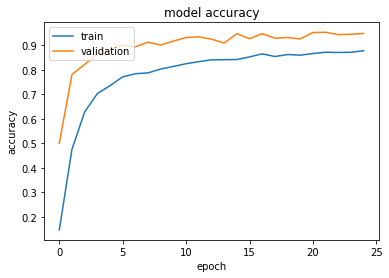

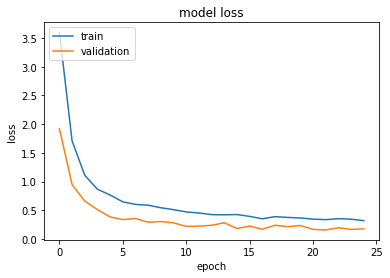

In [ ]:
# summarize history for accuracy
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_wt_cnn = np.argmax(model7.predict(x_test_wt_gaussion), axis=1)


In [ ]:
Y_pred_wt_cnn

array([23, 25, 27, ..., 23, 41,  9])

In [ ]:
# Classification metrics can't handle a mix of multilabel-indicator and multiclass targets
y_test_arg_wt_cnn=np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_arg_wt_cnn, Y_pred_wt_cnn))

0.9356687898089172


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test_arg_wt_cnn, Y_pred_wt_cnn))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.99      0.72      0.84       454
           2       1.00      0.97      0.98       439
           3       0.98      0.93      0.96       265
           4       0.97      0.99      0.98       421
           5       0.99      0.99      0.99       432
           6       1.00      0.97      0.98       162
           7       0.86      0.99      0.92       117
           8       0.98      0.98      0.98        81
           9       0.99      1.00      0.99       227
          10       0.98      0.95      0.96       246
          11       0.74      1.00      0.85        42
          12       0.85      0.77      0.81       454
          13       0.96      0.95      0.96        57
          14       0.97      0.90      0.93        68
          15       0.98      0.99      0.98        82
          16       0.94      0.89      0.92        94
          17       0.95    

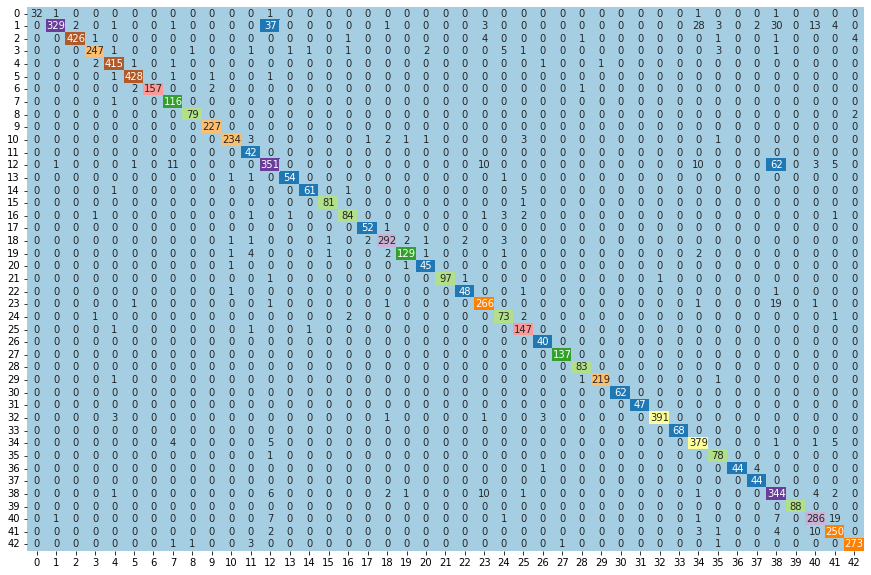

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm7 = metrics.confusion_matrix(y_test_arg_wt_cnn, Y_pred_wt_cnn)
plt.figure(figsize=(15,10))
sns.heatmap(cm7, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm7.diagonal()/cm7.sum(axis=1) * 100
balanced_WT_cnn_acc7 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_WT_cnn_acc7}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

Class_Label,Accuracy
0,88.89
1,72.47
2,97.04
3,93.21
4,98.57
5,99.07
6,96.91
7,99.15
8,97.53
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_wt_cnn, Y_pred_wt_cnn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_wt_cnn, Y_pred_wt_cnn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_wt_cnn, Y_pred_wt_cnn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_wt_cnn, Y_pred_wt_cnn,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.935669
Precision: 0.940265
Recall: 0.935669
F1 score: 0.935600


In [ ]:
mod="balanced_WT_cnn"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df7 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df7


,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_WT_cnn,0.9356687898089172,0.9402647301661651,0.9356687898089172,0.9355995836615155


In [ ]:
# saving the dataframe
df7.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_WT_cnn.csv',encoding = 'utf-8-sig')



In [ ]:
# Saving the model
model7.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_WT_cnn.h5")

In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_wt_cnn,  y_pred =   Y_pred_wt_cnn, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/balanced_WT_cnn.csv', index= True)

# **Model 8-ResNet 152 layer weight-class approch**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights=None,
    input_shape=(32,32, 3),
)

In [ ]:
#taking 152th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[152].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model8 = Model(inputs = resnet_preTrained.input, outputs = output)
model8.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [ ]:
#compiling the model
model8.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#training the model
n_epochs = 25
history8 =  model8.fit(X_train_m, y_train_m,class_weight=class_weight_dict, batch_size = 256, validation_split = 0.15, epochs = n_epochs, verbose = 1)


Epoch 1/25
105/105 [==============================] - 14s 95ms/step - loss: 2.0008 - accuracy: 0.3715 - val_loss: 3.3196 - val_accuracy: 0.1372
Epoch 2/25
105/105 [==============================] - 7s 66ms/step - loss: 0.5559 - accuracy: 0.7675 - val_loss: 1.1461 - val_accuracy: 0.6406
Epoch 3/25
105/105 [==============================] - 7s 66ms/step - loss: 0.2775 - accuracy: 0.8759 - val_loss: 0.4655 - val_accuracy: 0.8541
Epoch 4/25
105/105 [==============================] - 7s 69ms/step - loss: 0.1527 - accuracy: 0.9278 - val_loss: 0.3247 - val_accuracy: 0.8943
Epoch 5/25
105/105 [==============================] - 8s 73ms/step - loss: 0.1007 - accuracy: 0.9535 - val_loss: 0.4328 - val_accuracy: 0.8771
Epoch 6/25
105/105 [==============================] - 8s 76ms/step - loss: 0.1245 - accuracy: 0.9480 - val_loss: 0.5540 - val_accuracy: 0.8641
Epoch 7/25
105/105 [==============================] - 8s 73ms/step - loss: 0.0768 - accuracy: 0.9660 - val_loss: 0.2476 - val_accuracy: 0.925

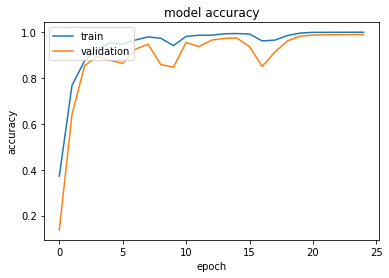

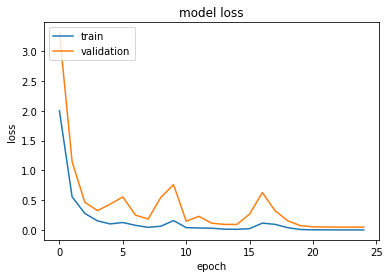

In [ ]:
# summarize history for accuracy
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:

Y_pred_wt_rn = np.argmax(model8.predict(x_test_wt_gaussion), axis=1)

In [ ]:
Y_pred_wt_rn

array([23, 25, 27, ..., 23, 41,  9])

In [ ]:
y_test_arg_wt_rn=np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(y_test_arg_wt_rn, Y_pred_wt_rn))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       0.98      0.95      0.96       454
           2       1.00      1.00      1.00       439
           3       0.99      0.99      0.99       265
           4       1.00      1.00      1.00       421
           5       1.00      1.00      1.00       432
           6       0.99      1.00      1.00       162
           7       0.95      0.97      0.96       117
           8       1.00      1.00      1.00        81
           9       1.00      1.00      1.00       227
          10       1.00      0.97      0.98       246
          11       0.98      1.00      0.99        42
          12       0.96      0.94      0.95       454
          13       0.95      0.98      0.97        57
          14       0.98      0.90      0.94        68
          15       1.00      1.00      1.00        82
          16       0.99      0.98      0.98        94
          17       1.00    

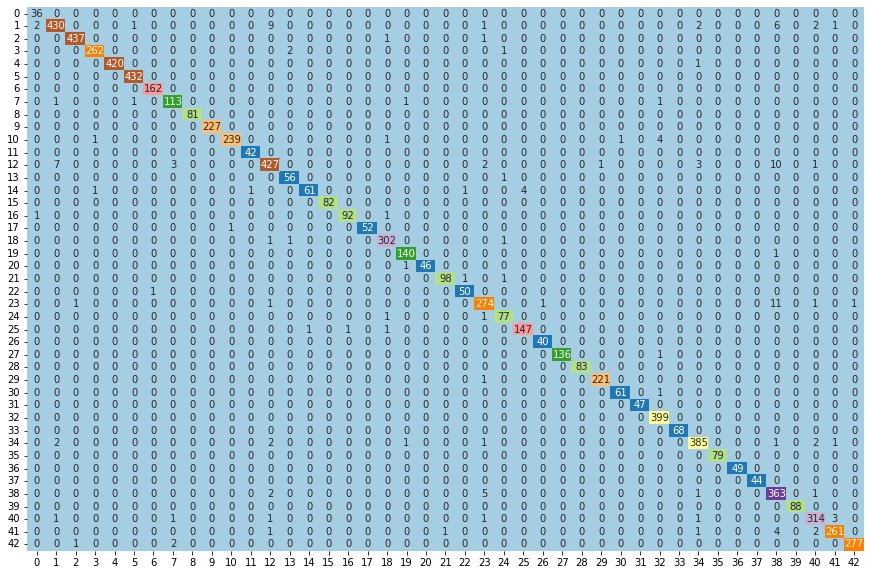

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm8 = metrics.confusion_matrix(y_test_arg_wt_rn, Y_pred_wt_rn)
plt.figure(figsize=(15,10))
sns.heatmap(cm8, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm8.diagonal()/cm8.sum(axis=1) * 100
balanced_wt_ResNet_152_acc8 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_wt_ResNet_152_acc8}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='green')

Class_Label,Accuracy
0,100.00
1,94.71
2,99.54
3,98.87
4,99.76
5,100.00
6,100.00
7,96.58
8,100.00
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_wt_rn, Y_pred_wt_rn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_wt_rn, Y_pred_wt_rn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_wt_rn, Y_pred_wt_rn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_wt_rn, Y_pred_wt_rn,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.980892
Precision: 0.981119
Recall: 0.980892
F1 score: 0.980896


In [ ]:
mod="balanced_wt_ResNet_152"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df8 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df8

,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_wt_ResNet_152,0.9808917197452229,0.9811190625443842,0.9808917197452229,0.9808956185119875


In [ ]:
# saving the dataframe
df8.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_wt_ResNet_152.csv',encoding = 'utf-8-sig')


In [ ]:
# Saving the model
model8.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_wt_ResNet_152.h5")

In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_wt_rn,   y_pred =  Y_pred_wt_rn, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_wt_ResNet_152.csv', index= True)

In [ ]:
# ResNet with 50 layer and imagenet weight

# Model 9- ResNet with 50 layer and weighted-class approch

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32, 3),
)

In [ ]:
#taking 50th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[50].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model9 = Model(inputs = resnet_preTrained.input, outputs = output)
model9.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [ ]:
#compiling the model
model9.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#training the model
n_epochs = 35
history9 =  model9.fit(X_train_m, y_train_m,class_weight=class_weight_dict, batch_size = 256, validation_split = 0.15, epochs = n_epochs, verbose = 1)

Epoch 1/35
105/105 [==============================] - 5s 30ms/step - loss: 0.7106 - accuracy: 0.7970 - val_loss: 0.8167 - val_accuracy: 0.7902
Epoch 2/35
105/105 [==============================] - 3s 26ms/step - loss: 0.0554 - accuracy: 0.9752 - val_loss: 0.1508 - val_accuracy: 0.9527
Epoch 3/35
105/105 [==============================] - 3s 26ms/step - loss: 0.0497 - accuracy: 0.9816 - val_loss: 0.1438 - val_accuracy: 0.9577
Epoch 4/35
105/105 [==============================] - 3s 28ms/step - loss: 0.0187 - accuracy: 0.9930 - val_loss: 0.0782 - val_accuracy: 0.9741
Epoch 5/35
105/105 [==============================] - 3s 26ms/step - loss: 0.0071 - accuracy: 0.9966 - val_loss: 0.0679 - val_accuracy: 0.9820
Epoch 6/35
105/105 [==============================] - 3s 26ms/step - loss: 0.0033 - accuracy: 0.9981 - val_loss: 0.0484 - val_accuracy: 0.9866
Epoch 7/35
105/105 [==============================] - 3s 26ms/step - loss: 0.0044 - accuracy: 0.9980 - val_loss: 0.0393 - val_accuracy: 0.9892

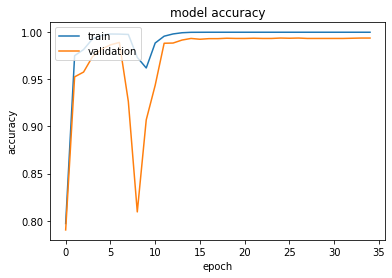

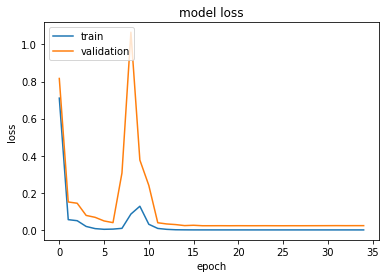

In [ ]:
# summarize history for accuracy
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
Y_pred_wt_rn50 = np.argmax(model9.predict(x_test_wt_gaussion), axis=1)

In [ ]:
Y_pred_wt_rn50

array([23, 25, 27, ..., 23, 41,  9])

In [ ]:
y_test_arg_wt_rn50=np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(y_test_arg_wt_rn50, Y_pred_wt_rn50))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.99      0.98      0.98       454
           2       1.00      1.00      1.00       439
           3       0.99      0.99      0.99       265
           4       1.00      1.00      1.00       421
           5       1.00      1.00      1.00       432
           6       1.00      0.99      1.00       162
           7       0.96      0.99      0.97       117
           8       1.00      1.00      1.00        81
           9       1.00      1.00      1.00       227
          10       0.99      0.99      0.99       246
          11       0.98      1.00      0.99        42
          12       0.98      0.98      0.98       454
          13       0.93      0.98      0.96        57
          14       0.98      0.96      0.97        68
          15       0.98      1.00      0.99        82
          16       0.99      0.99      0.99        94
          17       1.00    

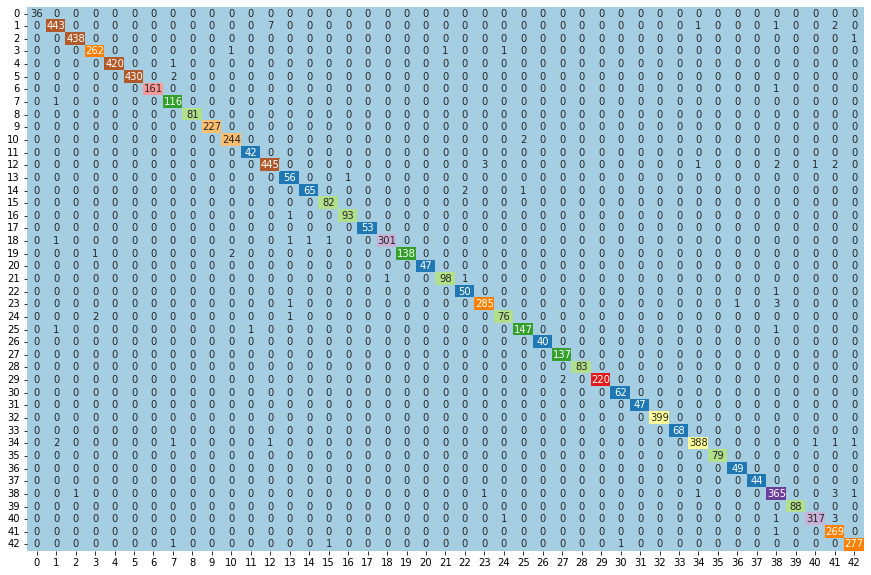

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm9 = metrics.confusion_matrix(y_test_arg_wt_rn50, Y_pred_wt_rn50)
plt.figure(figsize=(15,10))
sns.heatmap(cm9, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm9.diagonal()/cm9.sum(axis=1) * 100
balanced_wt_ResNet_50_acc9 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_wt_ResNet_50_acc9}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

Class_Label,Accuracy
0,100.00
1,97.58
2,99.77
3,98.87
4,99.76
5,99.54
6,99.38
7,99.15
8,100.00
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_wt_rn50, Y_pred_wt_rn50)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_wt_rn50, Y_pred_wt_rn50,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_wt_rn50, Y_pred_wt_rn50,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_wt_rn50, Y_pred_wt_rn50,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.989554
Precision: 0.989670
Recall: 0.989554
F1 score: 0.989573


In [ ]:

mod="balanced_wt_ResNet_50"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df9 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df9

,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_wt_ResNet_50,0.9895541401273885,0.9896703315301865,0.9895541401273885,0.9895728067350308


In [ ]:
# saving the dataframe
df9.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_wt_ResNet_50.csv',encoding = 'utf-8-sig')


In [ ]:
# Saving the model
model9.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_wt_ResNet_50.h5")


In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_wt_rn50,   y_pred =   Y_pred_wt_rn50, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_wt_ResNet_50.csv', index= True)

## **Handel imbalanced data**

## 3) TOMEK LINKS under-sampling

In [ ]:
# tomek undersampling

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
# Array Estimator expected <= 2. but Found array with dim 4.
# reshaping x
X2 = X.reshape(39249, 32*32*3, order ='a')
X2.shape


(39249, 3072)

In [ ]:

undersample = TomekLinks()
X_t, y_t = undersample.fit_resample(X2, y)

In [ ]:
X_t.shape, y_t.shape


((39187, 3072), (39187, 43))

In [ ]:
X_train_tm, X_test_t, y_train_tm, y_test_t = train_test_split(X_t, y_t, test_size=0.2, random_state=0)


In [ ]:
print("Using TOMEK")
print("X_Train Shape: ",X_train_tm.shape,"\nX_test shape: ",X_test_t.shape,"\ny_train shape: ",y_train_tm.shape,"\ny_Test Shape : ",y_test_t.shape)


Using TOMEK
X_Train Shape:  (31349, 3072) 
X_test shape:  (7838, 3072) 
y_train shape:  (31349, 43) 
y_Test Shape :  (7838, 43)


In [ ]:
X_train_t, X_val_t, y_train_t, y_val_t = train_test_split(X_train_tm, y_train_tm, test_size=0.2, random_state=0)


In [ ]:
print("validation split")
print("X_Train Shape: ",X_train_t.shape,"\nX_validation shape: ",X_val_t.shape,"\ny_train shape: ",y_train_t.shape,"\ny_validation Shape : ",y_val_t.shape)


validation split
X_Train Shape:  (25079, 3072) 
X_validation shape:  (6270, 3072) 
y_train shape:  (25079, 43) 
y_validation Shape :  (6270, 43)


In [ ]:
# cnn expecting 4 dim, so again reshape to orignal
X_train_t = X_train_t.reshape(X_train_t.shape[0],32,32,3)
X_val_t = X_val_t.reshape(X_val_t.shape[0],32,32,3)
X_test_t = X_test_t.reshape(X_test_t.shape[0],32,32,3)


In [ ]:
# X_train_tm = X_train_tm.reshape(X_train_tm.shape[0],32,32,3)


In [ ]:
import cv2

def add_gaussian_noise(X_imgs):
    gaussian_noise_imgs = []
    row, col, _ = X_imgs[0].shape
    # Gaussian distribution parameters
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    
    for X_img in X_imgs:
        gaussian = np.random.random((row, col, 1)).astype(np.float32)
        gaussian = np.concatenate((gaussian, gaussian, gaussian), axis = 2)
        gaussian_img = cv2.addWeighted(X_img, 0.75, 0.25 * gaussian, 0.25, 0)
        gaussian_noise_imgs.append(gaussian_img)
    gaussian_noise_imgs = np.array(gaussian_noise_imgs, dtype = np.float32)
    return gaussian_noise_imgs
  
# x_test_gaussion = add_gaussian_noise(X_imgs)

In [ ]:
x_test_tk_gaussion = add_gaussian_noise(X_test_t)

## Model 10- CNN TOMEK

In [ ]:
# Building a model

In [ ]:
model10 = Sequential()
model10.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model10.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model10.add(MaxPool2D(pool_size=(2, 2)))
model10.add(Dropout(rate=0.25))
model10.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model10.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model10.add(MaxPool2D(pool_size=(2, 2)))
model10.add(Dropout(rate=0.25))
model10.add(Flatten())
model10.add(Dense(256, activation='relu'))
model10.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model10.add(Dense(43, activation='softmax'))


In [ ]:
#Compilation of the model
model10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model10.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [ ]:
epochs = 25
history10 = model10.fit(X_train_t, y_train_t, batch_size=64, epochs=epochs, validation_data=(X_val_t, y_val_t))


Epoch 1/25
392/392 [==============================] - 4s 9ms/step - loss: 2.4612 - accuracy: 0.4001 - val_loss: 0.8118 - val_accuracy: 0.8132
Epoch 2/25
392/392 [==============================] - 3s 6ms/step - loss: 0.8963 - accuracy: 0.7347 - val_loss: 0.5299 - val_accuracy: 0.8962
Epoch 3/25
392/392 [==============================] - 3s 6ms/step - loss: 0.6081 - accuracy: 0.8157 - val_loss: 0.2026 - val_accuracy: 0.9486
Epoch 4/25
392/392 [==============================] - 3s 7ms/step - loss: 0.4771 - accuracy: 0.8561 - val_loss: 0.1841 - val_accuracy: 0.9611
Epoch 5/25
392/392 [==============================] - 3s 7ms/step - loss: 0.3965 - accuracy: 0.8808 - val_loss: 0.2070 - val_accuracy: 0.9427
Epoch 6/25
392/392 [==============================] - 3s 7ms/step - loss: 0.3402 - accuracy: 0.8941 - val_loss: 0.1012 - val_accuracy: 0.9700
Epoch 7/25
392/392 [==============================] - 3s 7ms/step - loss: 0.3000 - accuracy: 0.9072 - val_loss: 0.1000 - val_accuracy: 0.9735
Epoch 

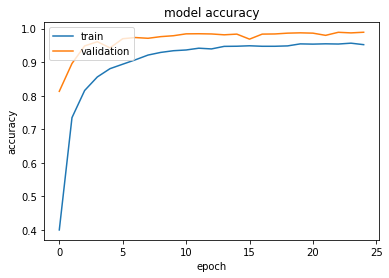

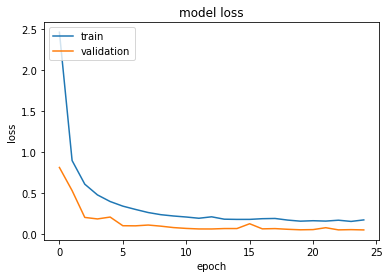

In [ ]:
# summarize history for accuracy
plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_tk_cnn = np.argmax(model10.predict(x_test_tk_gaussion), axis=1)


In [ ]:
Y_pred_tk_cnn

array([12,  5, 18, ...,  3, 22, 38])

In [ ]:
# Classification metrics can't handle a mix of multilabel-indicator and multiclass targets
y_test_arg_tk_cnn=np.argmax(y_test_t,axis=1)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_arg_tk_cnn, Y_pred_tk_cnn))


0.9900484817555499


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test_arg_tk_cnn, Y_pred_tk_cnn))


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        46
           1       0.99      0.97      0.98       475
           2       1.00      1.00      1.00       404
           3       0.99      1.00      0.99       257
           4       1.00      1.00      1.00       409
           5       0.99      1.00      1.00       409
           6       1.00      1.00      1.00       169
           7       0.99      0.99      0.99       119
           8       0.99      1.00      0.99        88
           9       1.00      1.00      1.00       241
          10       1.00      1.00      1.00       249
          11       0.97      0.97      0.97        34
          12       0.98      0.99      0.99       444
          13       0.97      0.96      0.97        77
          14       0.97      0.90      0.93        63
          15       0.99      1.00      0.99        91
          16       0.98      0.99      0.98        93
          17       0.98    

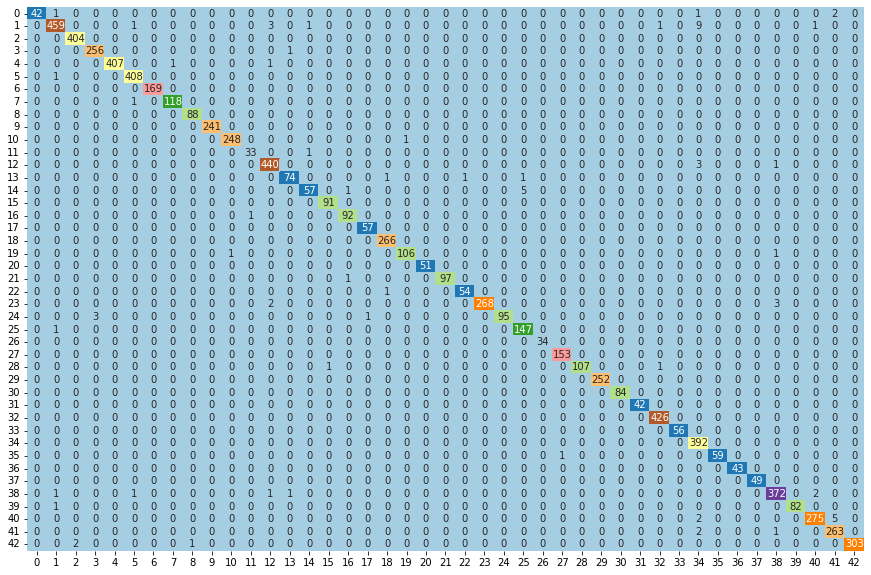

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm10 = metrics.confusion_matrix(y_test_arg_tk_cnn, Y_pred_tk_cnn)
plt.figure(figsize=(15,10))
sns.heatmap(cm10, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()


In [ ]:
classwise_acc = cm10.diagonal()/cm10.sum(axis=1) * 100
balanced_tk_cnn_acc10 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_tk_cnn_acc10}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='orange')

Class_Label,Accuracy
0,91.30
1,96.63
2,100.00
3,99.61
4,99.51
5,99.76
6,100.00
7,99.16
8,100.00
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_tk_cnn, Y_pred_tk_cnn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_tk_cnn, Y_pred_tk_cnn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_tk_cnn, Y_pred_tk_cnn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_tk_cnn, Y_pred_tk_cnn,average='weighted')
print('F1 score: %f' % f1)


Accuracy: 0.990048
Precision: 0.990158
Recall: 0.990048
F1 score: 0.990028


In [ ]:
mod="balanced_tk_cnn"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df10 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df10


,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_tk_cnn,0.9900484817555499,0.990158128816364,0.9900484817555499,0.9900277856136793


In [ ]:
# saving the dataframe
df10.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_cnn.csv',encoding = 'utf-8-sig')


In [ ]:
# Saving the model
model10.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_cnn.h5")


In [ ]:

clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg_tk_cnn, y_pred =  Y_pred_tk_cnn, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_cnn.csv', index= True)



## Model 11 - ResNet50 with 152 layer-TOMEK

In [ ]:
# Resnet 152

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50


In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights=None,
    input_shape=(32,32, 3),
)


In [ ]:
#taking 152th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[152].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model11 = Model(inputs = resnet_preTrained.input, outputs = output)
model11.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:

#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)


In [ ]:
#compiling the model
model11.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#callbacks
checkpoint = ModelCheckpoint('./best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)


In [ ]:

#training the model
n_epochs = 25
history11 =  model11.fit(X_train_t, y_train_t,  batch_size = 256, validation_data = (X_val_t, y_val_t), epochs = n_epochs, verbose = 1)


Epoch 1/25
98/98 [==============================] - 15s 111ms/step - loss: 1.6909 - accuracy: 0.5078 - val_loss: 2.5648 - val_accuracy: 0.3563
Epoch 2/25
98/98 [==============================] - 7s 67ms/step - loss: 0.4540 - accuracy: 0.8521 - val_loss: 1.4262 - val_accuracy: 0.6177
Epoch 3/25
98/98 [==============================] - 7s 68ms/step - loss: 0.2154 - accuracy: 0.9308 - val_loss: 0.5966 - val_accuracy: 0.8327
Epoch 4/25
98/98 [==============================] - 7s 70ms/step - loss: 0.1265 - accuracy: 0.9598 - val_loss: 0.2849 - val_accuracy: 0.9105
Epoch 5/25
98/98 [==============================] - 8s 77ms/step - loss: 0.0990 - accuracy: 0.9679 - val_loss: 0.6050 - val_accuracy: 0.8427
Epoch 6/25
98/98 [==============================] - 8s 84ms/step - loss: 0.0847 - accuracy: 0.9724 - val_loss: 0.3366 - val_accuracy: 0.9054
Epoch 7/25
98/98 [==============================] - 8s 81ms/step - loss: 0.0656 - accuracy: 0.9790 - val_loss: 0.2820 - val_accuracy: 0.9295
Epoch 8/25


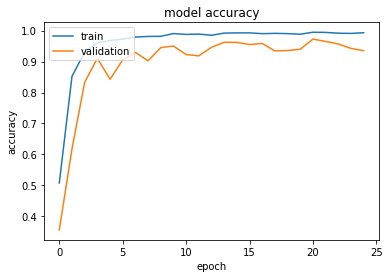

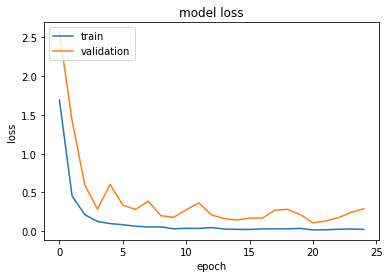

In [ ]:
# summarize history for accuracy
plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_tk_rn = np.argmax(model11.predict(x_test_tk_gaussion), axis=1)


In [ ]:
Y_pred_tk_rn


array([ 1,  5, 22, ...,  3, 22, 38])

In [ ]:
y_test_arg_tk_rn=np.argmax(y_test_t,axis=1)


In [ ]:
print(classification_report(y_test_arg_tk_rn, Y_pred_tk_rn))


              precision    recall  f1-score   support

           0       0.84      0.91      0.87        46
           1       1.00      0.70      0.82       475
           2       0.98      1.00      0.99       404
           3       0.97      0.99      0.98       257
           4       1.00      0.98      0.99       409
           5       0.97      1.00      0.98       409
           6       1.00      0.96      0.98       169
           7       1.00      0.91      0.95       119
           8       1.00      1.00      1.00        88
           9       0.98      0.99      0.98       241
          10       1.00      0.92      0.96       249
          11       1.00      0.97      0.99        34
          12       0.90      0.82      0.85       444
          13       0.99      0.88      0.93        77
          14       0.94      0.81      0.87        63
          15       0.93      1.00      0.96        91
          16       0.87      0.98      0.92        93
          17       1.00    

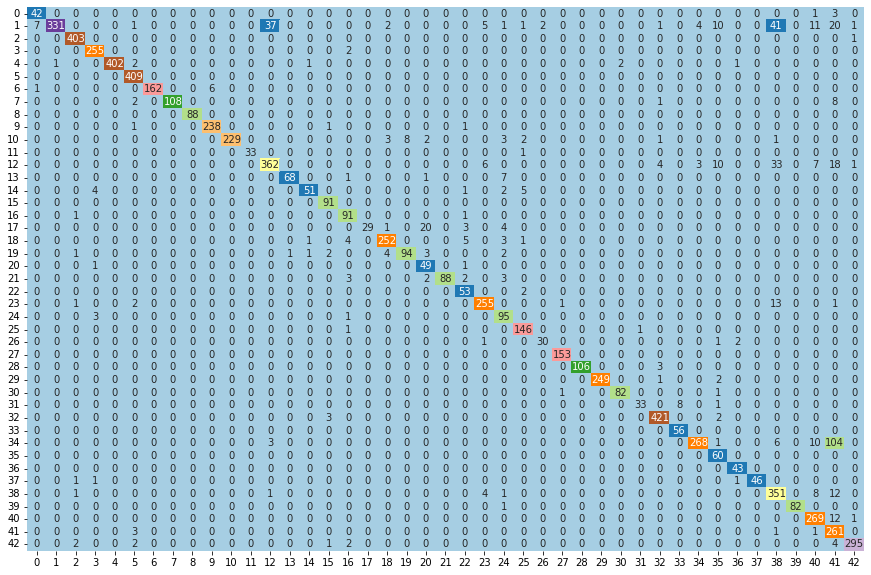

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm11 = metrics.confusion_matrix(y_test_arg_tk_rn, Y_pred_tk_rn)
plt.figure(figsize=(15,10))
sns.heatmap(cm11, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()


In [ ]:
classwise_acc = cm11.diagonal()/cm11.sum(axis=1) * 100
balanced_tk_ResNet50_152_acc11 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_tk_ResNet50_152_acc11}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='maroon')

Class_Label,Accuracy
0,91.30
1,69.68
2,99.75
3,99.22
4,98.29
5,100.00
6,95.86
7,90.76
8,100.00
9,98.76


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_tk_rn, Y_pred_tk_rn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_tk_rn, Y_pred_tk_rn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_tk_rn, Y_pred_tk_rn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_tk_rn, Y_pred_tk_rn,average='weighted')
print('F1 score: %f' % f1)


Accuracy: 0.922302
Precision: 0.936680
Recall: 0.922302
F1 score: 0.922845


In [ ]:
mod="balanced_tk_ResNet50_152"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df11 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df11


,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_tk_ResNet50_152,0.9223016075529472,0.9366803193757091,0.9223016075529472,0.922844869616429


In [ ]:
# saving the dataframe
df11.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_ResNet50_152.csv',encoding = 'utf-8-sig')


In [ ]:
# Saving the model
model11.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_ResNet50_152.h5")


In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg_tk_rn,  y_pred =Y_pred_tk_rn, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_ResNet50_152.csv', index= True)


## Model 12- ResNet50-50 layer-TOMEK 

In [ ]:
# Resnet 50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50


In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32, 3),
)


In [ ]:
#taking 50th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[50].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model12 = Model(inputs = resnet_preTrained.input, outputs = output)
model12.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)


In [ ]:
#compiling the model
model12.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#callbacks
checkpoint = ModelCheckpoint('./best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)


In [ ]:
#training the model
n_epochs = 25
history12 =  model12.fit(X_train_t, y_train_t,  batch_size = 256, validation_data = (X_val_t, y_val_t), epochs = n_epochs, verbose = 1)


Epoch 1/25
98/98 [==============================] - 5s 34ms/step - loss: 0.6519 - accuracy: 0.8253 - val_loss: 0.3930 - val_accuracy: 0.8766
Epoch 2/25
98/98 [==============================] - 3s 34ms/step - loss: 0.0515 - accuracy: 0.9856 - val_loss: 0.1132 - val_accuracy: 0.9652
Epoch 3/25
98/98 [==============================] - 3s 32ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.1300 - val_accuracy: 0.9611
Epoch 4/25
98/98 [==============================] - 3s 31ms/step - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.1850 - val_accuracy: 0.9416
Epoch 5/25
98/98 [==============================] - 3s 29ms/step - loss: 0.0169 - accuracy: 0.9952 - val_loss: 0.1299 - val_accuracy: 0.9636
Epoch 6/25
98/98 [==============================] - 3s 27ms/step - loss: 0.0157 - accuracy: 0.9952 - val_loss: 0.1238 - val_accuracy: 0.9656
Epoch 7/25
98/98 [==============================] - 3s 27ms/step - loss: 0.0262 - accuracy: 0.9914 - val_loss: 0.3145 - val_accuracy: 0.9344
Epoch 8/25
98

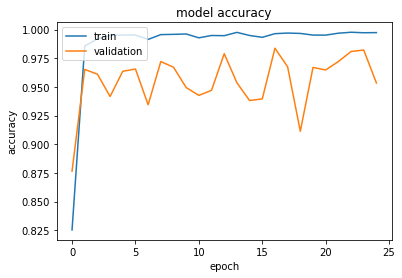

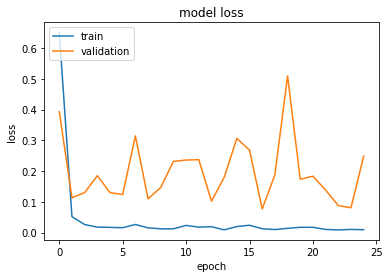

In [ ]:
# summarize history for accuracy
plt.plot(history12.history['accuracy'])
plt.plot(history12.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history12.history['loss'])
plt.plot(history12.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_tk_rs = np.argmax(model12.predict(x_test_tk_gaussion), axis=1)


In [ ]:
Y_pred_tk_rs


array([ 7,  5,  7, ...,  3, 22, 38])

In [ ]:
y_test_arg_tk_rs=np.argmax(y_test_t,axis=1)


In [ ]:
print(classification_report(y_test_arg_tk_rs, Y_pred_tk_rs))


              precision    recall  f1-score   support

           0       0.87      0.98      0.92        46
           1       0.96      0.93      0.95       475
           2       1.00      0.96      0.98       404
           3       1.00      0.80      0.89       257
           4       0.99      0.99      0.99       409
           5       0.99      1.00      0.99       409
           6       1.00      0.98      0.99       169
           7       0.89      0.99      0.94       119
           8       1.00      0.94      0.97        88
           9       1.00      1.00      1.00       241
          10       0.99      0.87      0.93       249
          11       0.97      1.00      0.99        34
          12       0.86      0.97      0.91       444
          13       0.92      0.91      0.92        77
          14       1.00      0.87      0.93        63
          15       0.97      0.97      0.97        91
          16       0.96      0.95      0.95        93
          17       0.79    

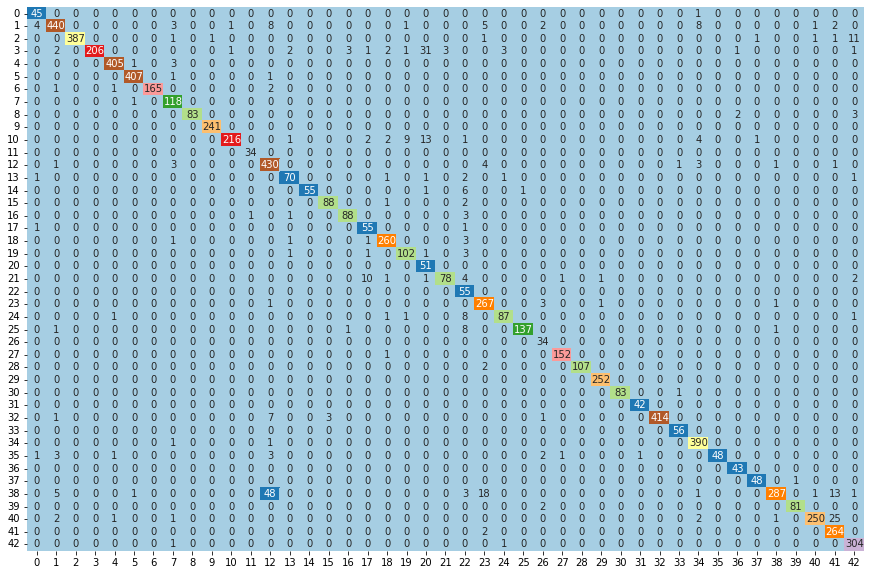

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm12 = metrics.confusion_matrix(y_test_arg_tk_rs, Y_pred_tk_rs)
plt.figure(figsize=(15,10))
sns.heatmap(cm12, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()


In [ ]:
classwise_acc = cm12.diagonal()/cm12.sum(axis=1) * 100
balanced_tk_ResNet50_50_acc12 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_tk_ResNet50_50_acc12}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

Class_Label,Accuracy
0,97.83
1,92.63
2,95.79
3,80.16
4,99.02
5,99.51
6,97.63
7,99.16
8,94.32
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_tk_rs, Y_pred_tk_rs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_tk_rs, Y_pred_tk_rs,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_tk_rs, Y_pred_tk_rs,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_tk_rs, Y_pred_tk_rs,average='weighted')
print('F1 score: %f' % f1)


Accuracy: 0.947308
Precision: 0.955722
Recall: 0.947308
F1 score: 0.948257


In [ ]:
mod="balanced_tk_ResNet50_50"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df12 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df12


,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_tk_ResNet50_50,0.947307986731309,0.9557215445539217,0.947307986731309,0.9482574501509418


In [ ]:
# saving the dataframe
df12.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_ResNet50_50.csv',encoding = 'utf-8-sig')


In [ ]:
# Saving the model
model12.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_ResNet50_50.h5")


In [ ]:

clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_tk_rs,  y_pred = Y_pred_tk_rs, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_ResNet50_50.csv', index= True)


## Making DataFrame of class-wise Accuracy

In [ ]:
zipped = list(zip(imbalance_cnn_acc1, imbalanced_ResNet50_152_acc2, imbalanced_ResNet_L50_acc3, balanced_SMOTE_CNN_acc4, 
balanced_SMOTE_ResNet_152_acc5, balanced_SMOTE_ResNet_50_acc6, balanced_WT_cnn_acc7, balanced_wt_ResNet_152_acc8, 
balanced_wt_ResNet_50_acc9, balanced_tk_cnn_acc10, balanced_tk_ResNet50_152_acc11, balanced_tk_ResNet50_50_acc12 ))

In [ ]:
Accuracy = pd.DataFrame(zipped, columns=['imbalance_cnn_acc1', 'imbalanced_ResNet50_152_acc2', 'imbalanced_ResNet_L50_acc3', 'balanced_SMOTE_CNN_acc4', 
'balanced_SMOTE_ResNet_152_acc5', 'balanced_SMOTE_ResNet_50_acc6', 'balanced_WT_cnn_acc7', 'balanced_wt_ResNet_152_acc8', 
'balanced_wt_ResNet_50_acc9', 'balanced_tk_cnn_acc10', 'balanced_tk_ResNet50_152_acc11', 'balanced_tk_ResNet50_50_acc12'])

In [ ]:
Accuracy

,imbalance_cnn_acc1,imbalanced_ResNet50_152_acc2,imbalanced_ResNet_L50_acc3,balanced_SMOTE_CNN_acc4,balanced_SMOTE_ResNet_152_acc5,balanced_SMOTE_ResNet_50_acc6,balanced_WT_cnn_acc7,balanced_wt_ResNet_152_acc8,balanced_wt_ResNet_50_acc9,balanced_tk_cnn_acc10,balanced_tk_ResNet50_152_acc11,balanced_tk_ResNet50_50_acc12
0,66.666667,91.666667,97.222222,100.000000,98.929336,99.571734,88.888889,100.000000,100.000000,91.304348,91.304348,97.826087
1,90.088106,96.916300,97.577093,96.642686,95.683453,98.321343,72.466960,94.713656,97.577093,96.631579,69.684211,92.631579
2,99.316629,96.127563,97.266515,99.350649,99.350649,99.783550,97.038724,99.544419,99.772210,100.000000,99.752475,95.792079
3,98.867925,100.000000,100.000000,99.541284,100.000000,98.165138,93.207547,98.867925,98.867925,99.610895,99.221790,80.155642
4,99.762470,99.762470,99.762470,100.000000,100.000000,99.128540,98.574822,99.762470,99.762470,99.511002,98.288509,99.022005
5,99.537037,98.148148,100.000000,99.774266,99.548533,99.097065,99.074074,100.000000,99.537037,99.755501,100.000000,99.511002
6,100.000000,99.382716,100.000000,100.000000,99.789474,100.000000,96.913580,100.000000,99.382716,100.000000,95.857988,97.633136
7,99.145299,97.435897,98.290598,100.000000,100.000000,100.000000,99.145299,96.581197,99.145299,99.159664,90.756303,99.159664
8,100.000000,98.765432,97.530864,100.000000,100.000000,99.785867,97.530864,100.000000,100.000000,100.000000,100.000000,94.318182
9,100.000000,96.916300,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,98.755187,100.000000


In [ ]:
Accuracy.to_csv('/content/drive/MyDrive/DBDA_PROJECT/AccuracyG.csv')